In [66]:
import pandas as pd 
import numpy as np
%matplotlib inline


In [56]:
L2022=pd.read_csv("./data/station/2022_MM_station.csv")
L2023=pd.read_csv("./data/station/2023_MM_station.csv")
L2024=pd.read_csv("./data/station/2024_MM_station.csv")

In [57]:
data=pd.read_csv("./data/satellite/ERA5_MM.csv")

In [58]:
data=data.drop(columns=['system:index','.geo','time'])


In [59]:
labels=pd.concat([L2022,L2023,L2024],axis=0).reset_index(drop=True)
labels.shape
labels=labels[['NO2 (µg/m³)','Ozone (µg/m³)']]

In [60]:
data=pd.concat([data,labels],axis=1)

In [61]:
train=data[:17520]
test=data[17520:]

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
imputer=KNNImputer(n_neighbors=3)

train_imputed=imputer.fit_transform(train)
test_imputed=imputer.transform(test)

labels=train_imputed[:,-2:]
train_imputed=train_imputed[:,:-2]
test_labels=test_imputed[:,-2:]
test_imputed=test_imputed[:,:-2]

scaler=StandardScaler()
train_z=scaler.fit_transform(train_imputed)
test_z=scaler.transform(test_imputed)



(17520, 11) (8784, 11)
(17520, 9) (8784, 9)


In [63]:
train_pd=pd.DataFrame(train_z,columns=train.columns)

Index(['boundary_layer_height', 'dewpoint_temperature_2m', 'surface_pressure',
       'surface_solar_radiation_downwards', 'temperature_2m',
       'total_cloud_cover', 'total_precipitation', 'u_component_of_wind_100m',
       'v_component_of_wind_100m', 'NO2 (µg/m³)', 'Ozone (µg/m³)'],
      dtype='object')

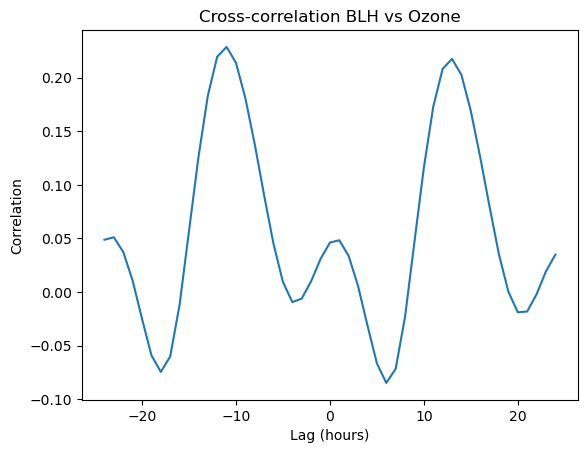

In [71]:
lags = range(-24, 25)  # up to ±24 hours
corrs = [train['boundary_layer_height'].shift(l).corr(train['NO2 (µg/m³)']) for l in lags]

import matplotlib.pyplot as plt
plt.plot(lags, corrs)
plt.xlabel("Lag (hours)")
plt.ylabel("Correlation")
plt.title("Cross-correlation BLH vs Ozone")
plt.show()

In [ ]:
np.save("./processed_data/train/train.npy",train_z)
np.save("./processed_data/test/test.npy",test_z)
np.save("./processed_data/train/train_labels.npy",labels)
np.save("./processed_data/test/test_labels.npy",test_labels)